<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/Dataset" property="dct:title" rel="dct:type">This pyAgrum's notebook</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

import os

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.about()
gnb.configuration()


pyAgrum version 0.14.1.9
(c) Pierre-Henri Wuillemin, Christophe Gonzales, Lionel Torti
    UPMC 2015

    This is free software; see the source code for copying conditions.
    There is ABSOLUTELY NO WARRANTY; not even for MERCHANTABILITY or
    FITNESS FOR A PARTICULAR PURPOSE.  For details, see 'pyAgrum.warranty'.
    


Library,Version
OS,posix [linux]
Python,"3.7.2 (default, Jan 10 2019, 23:51:51) [GCC 8.2.1 20181127]"
IPython,7.3.0
MatPlotLib,3.0.2
Numpy,1.16.1
pyAgrum,0.14.1.9


# Generating the database from a BN

In [3]:
bn=gum.loadBN(os.path.join("res","asia.bif"))
bn

(gum::BayesNet<double>@0x55f3a9c165a0) BN{nodes: 8, arcs: 8, domainSize: 256, parameters: 36, compression ratio: 85% }

In [4]:
gum.generateCSV(bn,os.path.join("out","sample_asia.csv"),500000,True)

 out/sample_asia.csv : [ ##################################################### ] 100%ut/sample_asia.csv : [ ####################                                  ] 37%out/sample_asia.csv : [ #############################                         ] 54%out/sample_asia.csv : [ ###############################                       ] 59%out/sample_asia.csv : [ ################################                      ] 61%out/sample_asia.csv : [ #########################################             ] 78%out/sample_asia.csv : [ #############################################         ] 84%
Log2-Likelihood : -1612599.5104995884


-1612599.5104995884

In [5]:
import pyAgrum.lib._utils.oslike as oslike
print("===\n  Size of the generated database\n===")
oslike.wc_l(os.path.join("out","sample_asia.csv"))
print("\n===\n  First lines\n===")
oslike.head(os.path.join("out","sample_asia.csv"))

===
  Size of the generated database
===
500000

===
  First lines
===
tuberculos_or_cancer?,positive_XraY?,smoking?,dyspnoea?,lung_cancer?,tuberculosis?,visit_to_Asia?,bronchitis?
1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
1,1,0,0,1,1,1,0
1,1,1,0,1,1,1,0
1,1,0,1,1,1,1,0
1,1,0,0,1,1,1,0
1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,0
1,1,0,0,1,1,1,0



In [6]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.names()

('visit_to_Asia?',
 'tuberculosis?',
 'tuberculos_or_cancer?',
 'positive_XraY?',
 'lung_cancer?',
 'smoking?',
 'bronchitis?',
 'dyspnoea?')

In [7]:
learner.idFromName('visit_to_Asia?') # first row is 0

0

In [8]:
learner.nameFromId(4)

'lung_cancer?'

The BNLearner is capable of recognizing missing values in databases. For this purpose, just indicate as a last argument the list of the strings that represent missing values. Note that, currently, the BNLearner is not yet able to learn in the presence of missing values. This is the reason why, when it discovers that there exist such values, it raises a gum.MissingValueInDatabase exception.

In [9]:
# it is possible to add as a last argument a list of the symbols that represent missing values:
# whenever a cell of the database is equal to one of these strings, it is considered as a 
# missing value
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn, ['?', 'N/A'] )

In [10]:
oslike.head(os.path.join("res","asia_missing.csv"))

try:
    learner=gum.BNLearner(os.path.join("res","asia_missing.csv"),bn, ['?', 'N/A'] )
except gum.MissingValueInDatabase:
    print ( "exception raised: there are missing values in the database" )

smoking?,lung_cancer?,bronchitis?,visit_to_Asia?,tuberculosis?,tuberculos_or_cancer?,dyspnoea?,positive_XraY?
0,0,0,1,1,0,0,0
1,1,0,1,1,1,0,1
1,1,1,1,1,1,1,1
1,1,0,1,1,1,0,N/A
0,1,0,1,1,1,1,1
1,1,1,1,1,1,1,1
1,1,1,1,1,1,0,1
1,1,0,1,1,1,0,1
1,1,1,1,1,1,1,1



# Parameters learning from the database

We give the $bn$ as a parameter for the learner in order to have the variables and the order of the labels for each variables. Please try to remove the argument $bn$ in the first line below to see the difference ...

In [11]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables and labels
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()
gnb.showBN(bn2)

In [12]:
from IPython.display import HTML

HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('visit_to_Asia?')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('visit_to_Asia?')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('tuberculosis?')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('tuberculosis?')))
     +'</center></td></tr></table>')

# Structural learning a BN from the database

## Different learning algorithms

For now, there are three algorithms that are wrapped in pyAgrum : LocalSearchWithTabuList,

In [13]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))
kl=gum.BruteForceKL(bn,bn2)
kl.compute()


Learned in 198.225706ms


** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


{'klPQ': 1.9517705075654257e-05,
 'errorPQ': 0,
 'klQP': 1.6629112245800104e-05,
 'errorQP': 128,
 'hellinger': 0.002690121106052282,
 'bhattacharya': 3.612740442852308e-06,
 'jensen-shannon': 5.004808776958205e-06}

A greedy Hill Climbing algorithm (with insert, remove and change arc as atomic operations).

In [14]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))

Learned in 502.36828600000007ms


And a K2 for those who likes it :)

In [15]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useK2([0,1,2,3,4,5,6,7])
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
bn2

Learned in 161.650964ms


(gum::BayesNet<double>@0x55f3ada59850) BN{nodes: 8, arcs: 9, domainSize: 256, parameters: 38, compression ratio: 85% }

K2 can be very good if the order is the good one (a topological order of nodes in the reference)


In [16]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useK2([7,6,5,4,3,2,1,0])
bn2=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
bn2

Learned in 0.29079355199999996s


(gum::BayesNet<double>@0x55f3ad7fbff0) BN{nodes: 8, arcs: 16, domainSize: 256, parameters: 90, compression ratio: 64% }

# Following the learning curve

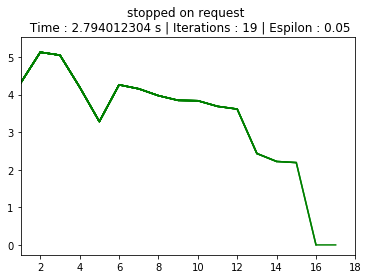

In [17]:
import numpy as np
%matplotlib inline

learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()

# we could prefere a log2likelihood score
# learner.useScoreLog2Likelihood()
learner.setMaxTime(10)

# representation of the error as a pseudo log (negative values really represents negative epsilon
@np.vectorize
def pseudolog(x):
    seuil=2.0
    y=-x if x<0 else x
        
    if y<seuil:
        res=y*np.log10(seuil)/seuil
    else:
        res=np.log10(y)
        
    return res if x>0 else -res

# in order to control the complexity, we limit the number of parents
learner.setMaxIndegree(3) # no more than 3 parent by node
gnb.animApproximationScheme(learner,
                            scale=pseudolog) # scale by default is np.log10

bn2=learner.learnBN()


# Customizing the learning algorithms

## 1. Learn a tree ?

In [18]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

learner.setMaxIndegree(1) # no more than 1 parent by node

bntree=learner.learnBN()
bntree

(gum::BayesNet<double>@0x55f3ae826b40) BN{nodes: 8, arcs: 7, domainSize: 256, parameters: 30, compression ratio: 88% }

## 2. with prior structural knowledge

In [19]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc("smoking?","lung_cancer?") # smoking->lung_cancer
# I know that visit to Asia may change the risk of tuberculosis
learner.addMandatoryArc("visit_to_Asia?","tuberculosis?") # visit_to_Asia->tuberculosis

bn2=learner.learnBN()
gnb.showBN(bn2,size="5")

## 3. comparing BNs

In [20]:
help(gnb.getBNDiff)

Help on function getBNDiff in module pyAgrum.lib.notebook:

getBNDiff(bn1, bn2, size='4', format='png')
    get a HTML string representation of a graphical diff between the arcs of _bn1 (reference) with those of _bn2.
    
    * full black line: the arc is common for both
    * full red line: the arc is common but inverted in _bn2
    * dotted black line: the arc is added in _bn2
    * dotted red line: the arc is removed in _bn2
    
    :param BayesNet bn1: referent model for the comparison
    :param BayesNet bn2: bn compared to the referent model
    :param size: size of the rendered graph
    :param format: render as "png" or "svg"



In [21]:
gnb.sideBySide(bn,bn2,gnb.getBNDiff(bn,bn2),
              captions=['target','learned BN','graphical diffs between target and learned'])

target,learned BN,graphical diffs between target and learned


In [22]:
kl=gum.BruteForceKL(bn,bn2)
kl.compute()

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


{'klPQ': 2.683205400025204e-05,
 'errorPQ': 0,
 'klQP': 2.3859406025233823e-05,
 'errorQP': 128,
 'hellinger': 0.0031278701862493697,
 'bhattacharya': 4.886156022910461e-06,
 'jensen-shannon': 6.835585283001555e-06}

## 3. changing the scores

By default, a BDEU score is used. But it can be changed.

In [23]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc(0,1)

# we prefere a log2likelihood score
learner.useScoreLog2Likelihood()

# in order to control the complexity, we limit the number of parents
learner.setMaxIndegree(1) # no more than 1 parent by node

bn2=learner.learnBN()
kl=gum.BruteForceKL(bn,bn2)
gnb.sideBySide(bn2,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


## 4. Mixing algorithms

First we learn a structure with HillClimbing (faster ?)

In [24]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()
learner.addMandatoryArc(0,1)
bn2=learner.learnBN()
kl=gum.BruteForceKL(bn,bn2)
gnb.sideBySide(bn2,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


And then we refine with tabuList

In [25]:
learner=gum.BNLearner(os.path.join("out","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()

learner.setInitialDAG(bn2.dag())
#learner.setMaxNbDecreasingChanges(2)

bn3=learner.learnBN()
kl=gum.BruteForceKL(bn,bn3)
gnb.sideBySide(bn3,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


# Impact of the size of the database for the learning

In [26]:
!head out/sample_asia.csv

tuberculos_or_cancer?,positive_XraY?,smoking?,dyspnoea?,lung_cancer?,tuberculosis?,visit_to_Asia?,bronchitis?
1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
1,1,0,0,1,1,1,0
1,1,1,0,1,1,1,0
1,1,0,1,1,1,1,0
1,1,0,0,1,1,1,0
1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,0
1,1,0,0,1,1,1,0


In [27]:
import IPython.display
rows=3
sizes=[400,500,700,1000,2000,5000,
       10000,50000,75000,
       100000,150000,175000,
       200000,300000,500000]


401
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
501
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
701
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
1001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
2001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
5001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
10001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
50001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
75001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
100001
** pyAgrum.B

1.9596690077137774e-05


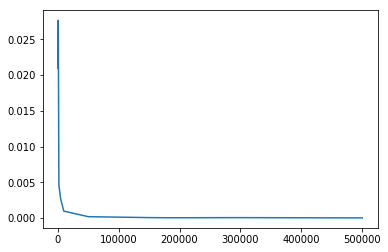

In [28]:
res="<table>"
nbr=0
l=[]
for i in sizes:
    n=i+1
    oslike.rm(os.path.join("out",'extract_asia.csv'))
    oslike.head(os.path.join("out","sample_asia.csv"),n,os.path.join("out","extract_asia.csv"))
    oslike.wc_l(os.path.join("out","extract_asia.csv"))
    learner=gum.BNLearner(os.path.join("out","extract_asia.csv"),bn) # using bn as template for variables
    learner.useGreedyHillClimbing()
    bn2=learner.learnBN()
    
    kl=gum.BruteForceKL(bn,bn2)
    r=kl.compute()
    l.append(r['klPQ'])
    
    if nbr % rows == 0:
        res+="<tr>"
    res+="<td><center>size="+str(i)+"</center>"+gnb.getBN(bn2,size="3",format="svg")+"</td>"
    nbr+=1
    if nbr % rows == 0:
        res+="</tr>"
if nbr % rows!=0:
    res+="</tr>"
res+="</table>"

IPython.display.display(IPython.display.HTML(res))

plot(sizes,l)
print(l[-1])

401
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
501
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
701
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
1001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
2001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
5001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
10001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
50001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
75001
** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.
100001
** pyAgrum.B

1.9517705075654257e-05


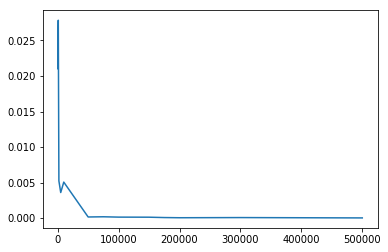

In [29]:
res="<table>"
nbr=0
l=[]
for i in sizes:
    n=i+1
    oslike.rm(os.path.join("out","extract_asia.csv"))
    oslike.head(os.path.join("out","sample_asia.csv"),n,os.path.join("out","extract_asia.csv"))
    oslike.wc_l(os.path.join("out","extract_asia.csv"))
    learner=gum.BNLearner(os.path.join("out","extract_asia.csv"),bn) #using bn as template for variables
    learner.useLocalSearchWithTabuList()
    bn2=learner.learnBN()
    
    kl=gum.BruteForceKL(bn,bn2)
    r=kl.compute()
    l.append(r['klPQ'])
    
    bn2.setProperty("name","BN(%{0})".format(i))
    if nbr % rows == 0:
        res+="<tr>"
    res+="<td><center>size="+str(i)+"</center>"+gnb.getBN(bn2,size="3",format="svg")+"</td>"
    nbr+=1
    if nbr % rows == 0:
        res+="</tr>"
if nbr % rows!=0:
    res+="</tr>"
res+="</table>"

IPython.display.display(IPython.display.HTML(res))

plot(sizes,l)
print(l[-1])